In this dataset, were are going to be exploring sales information provided.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Video_Games_Sales_as_at_22_Dec_2016.csv



Let us start by importing some helper libraries and the dataset as well

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from brewer2mpl import qualitative

In [3]:
df= pd.read_csv("../input/Video_Games_Sales_as_at_22_Dec_2016.csv")
df.shape

(16719, 16)

Now that we know the shape of the dataset, let's have a peek at the data and try to find if they are any missing values.

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The cell below shows the data type of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


The cell below shows the column name and the number of empty rows.

In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

A list of all the columns in the dataset

In [9]:
df.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

Calculating the % of missing values 

In [10]:
df_na= ( df.isnull().sum() / len(df) ) * 100
df_na= df_na.drop(df_na[df_na == 0].index).sort_values(ascending= False)

[Text(0,0.5,'% Missing'), Text(0.5,1,'Missing Values Plot')]

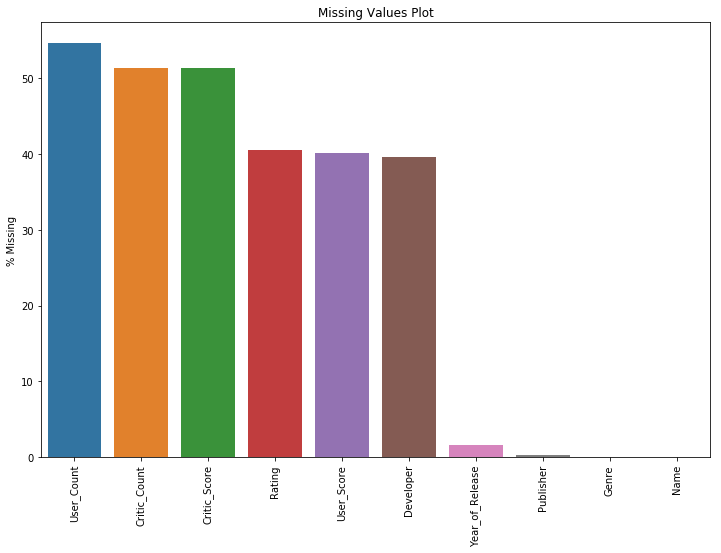

In [11]:
f, ax= plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na.values)
ax.set(title='Missing Values Plot', ylabel='% Missing')


Unique Gaming platforms

In [13]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

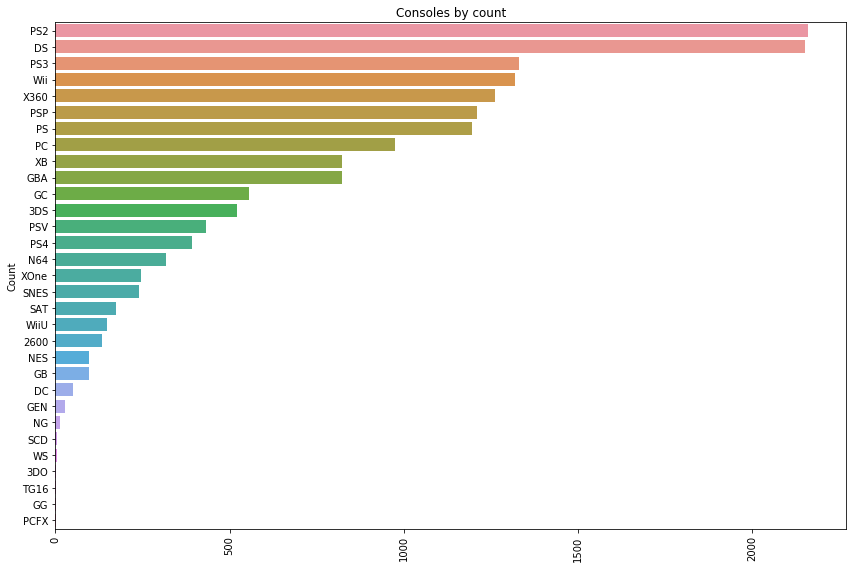

In [14]:
#df.Platform.value_counts()
ssc = df.Platform.value_counts()
f, ax= plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=ssc.values, y=ssc.index, orient='h')
ax.set(title='Consoles by count', ylabel='Count')
f.tight_layout()

dropping all NA values

In [15]:

df_clean= df.dropna(axis=0)
df_clean.shape

(6825, 16)

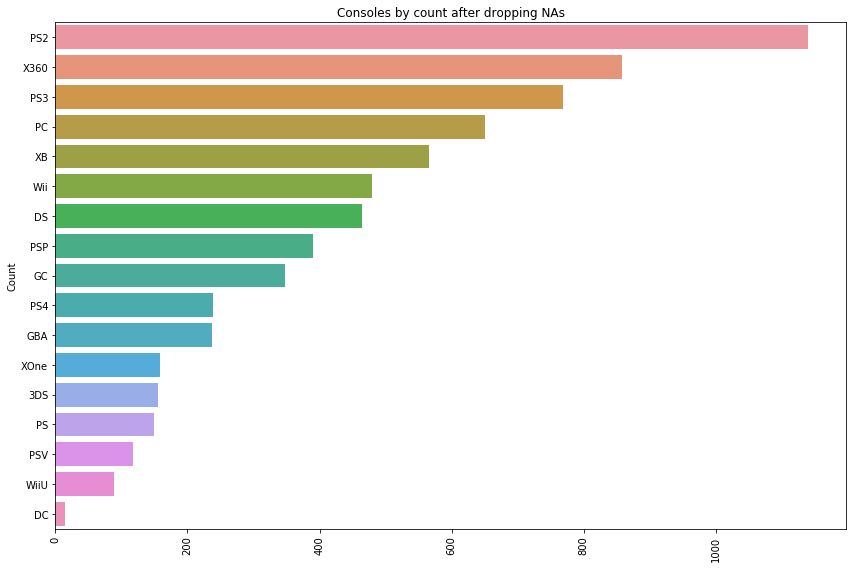

In [16]:
ssc = df_clean.Platform.value_counts()
f, ax= plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=ssc.values, y=ssc.index, orient='h')
ax.set(title='Consoles by count after dropping NAs', ylabel='Count')
f.tight_layout()

In [17]:
#df['User_Score']= df['User_Score'].convert_objects(convert_numeric=True)
df_clean.User_Score= df_clean.User_Score.astype('float')
#df.User_Score.dtype
#df['User_Score'] = video['User_Score'].convert_objects(convert_numeric= True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Plot of the user score v the critic score of games. It appears the users and the critics agree on 
games with score greater than 8.

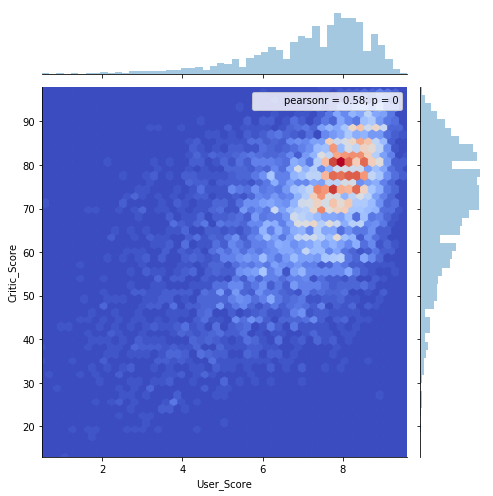

In [18]:
sns.jointplot(x='User_Score', y='Critic_Score', data=df_clean, kind='hex', cmap='coolwarm', size=7)


Critic score v critic count. From this plot, we observe that few critics give scores above 80.

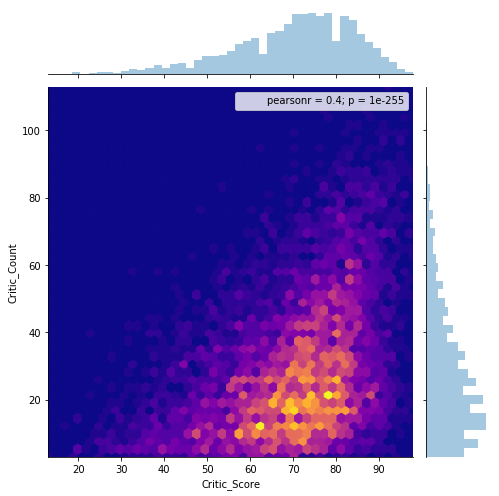

In [19]:
sns.jointplot(x='Critic_Score', y='Critic_Count', data=df_clean, kind='hex', cmap='plasma', size=7)

CORRELATION BETWEEN COLUMNS

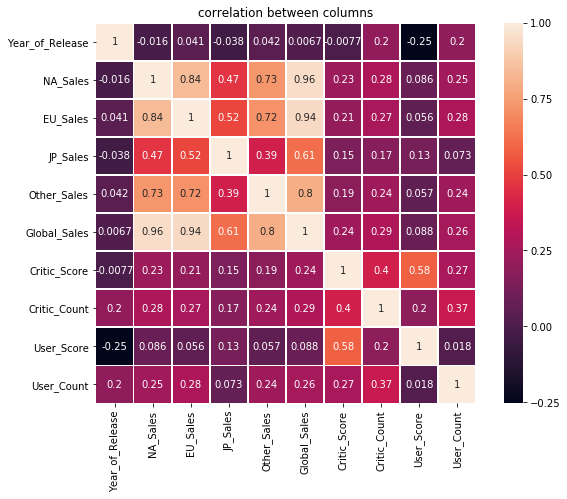

In [22]:
stats=['Year_of_Release','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 
       'Rating']
corrmat = df_clean[stats].corr()

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
plt.title('correlation between columns')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

Taking a look at Playstation

In [25]:
play= df_clean[(df_clean['Platform']== 'PS2') | (df_clean['Platform']== 'PS3')
              | (df_clean['Platform']== 'PS')| (df_clean['Platform']== 'PS4')]
play.shape

(2298, 16)

Playststation Global 1994-2016

[Text(3.2,0.5,'Cumulative count'),
 Text(0.5,1,'Playststation Global over the year')]

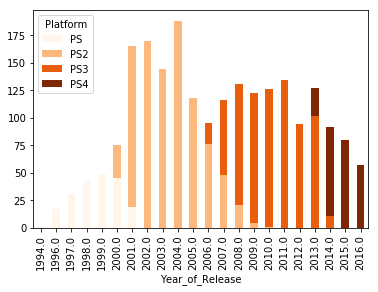

In [26]:
sales_Play= play.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum()
sales_Play.unstack().plot(kind='bar',stacked=True, colormap= 'Oranges',  grid=False)
ax.set(title='Playststation Global over the year', ylabel='Cumulative count')

Top selling genre for Playstation

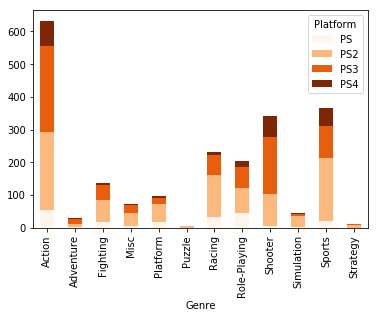

In [28]:
sales_Play= play.groupby(['Genre', 'Platform'])['Global_Sales'].sum()
sales_Play.unstack().plot(kind='bar',stacked=True, colormap= 'Oranges',  grid=False)

Rating of the games made

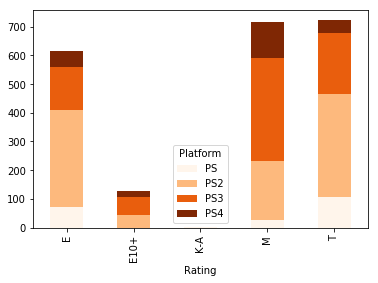

In [29]:
sales_Play= play.groupby(['Rating', 'Platform'])['Global_Sales'].sum()
sales_Play.unstack().plot(kind='bar',stacked=True, colormap= 'Oranges',  grid=False)

Taking a closer look at Xbox 

In [30]:
xb= df_clean[(df_clean['Platform']== 'X360') | (df_clean['Platform']== 'XOne')
              | (df_clean['Platform']== 'XB')]
xb.shape

(1582, 16)

Global sales of the Xbox consoles globally 1994-2016

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


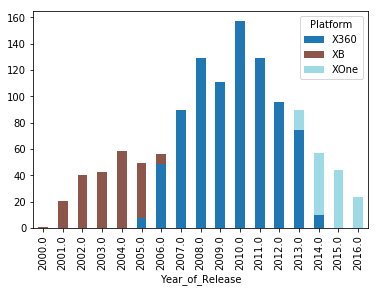

In [32]:
sales_xb= xb.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum()
sales_xb.unstack().plot(kind='bar',stacked=True, colormap= 'Vega20',  grid=False)

Top selling genre per Xbox console. The top selling genre is the shooter, which makes sense because of the 
halo franchise.

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


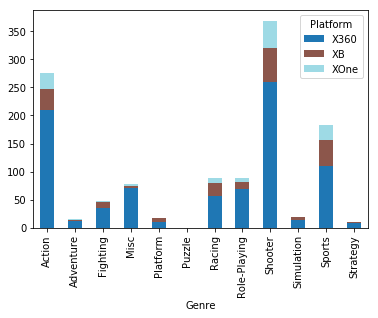

In [33]:
sales_xb= xb.groupby(['Genre', 'Platform'])['Global_Sales'].sum()
sales_xb.unstack().plot(kind='bar',stacked=True, colormap= 'Vega20',  grid=False)

Rating and global sales

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


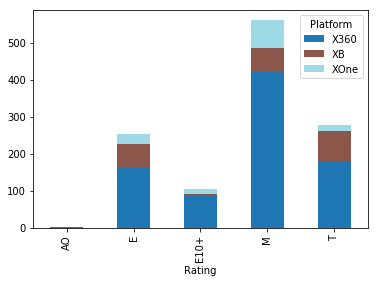

In [35]:
sales_xb= xb.groupby(['Rating', 'Platform'])['Global_Sales'].sum()
sales_xb.unstack().plot(kind='bar',stacked=True, colormap= 'Vega20',  grid=False)

Taking a closer look at nintendo 

In [36]:
nintendo= df_clean[(df_clean['Platform']== 'DS') | (df_clean['Platform']== 'Wii')
              | (df_clean['Platform']== 'GC')| (df_clean['Platform']== 'GBA')
                  |(df_clean['Platform']== '3DS') | (df_clean['Platform']== 'WiiU')]
nintendo.shape

(1772, 16)

Platform and total global sales from 1994-2016

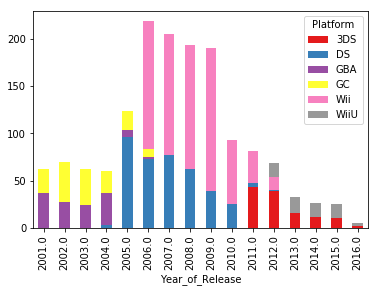

In [37]:
nintendo_sales= nintendo.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum()
nintendo_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Set1',  grid=False)

Genre and total sales on platform. Nintendo looks to be selling alot of sports oriented games, especially on the 
Wii. However the Wii U is struggling in sales.

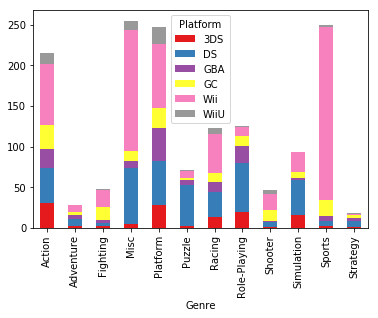

In [38]:
nintendo_sales= nintendo.groupby(['Genre', 'Platform'])['Global_Sales'].sum()
nintendo_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Set1',  grid=False)

Rating and total global sales. Nintendo sold majorly in the category of E (everyone)

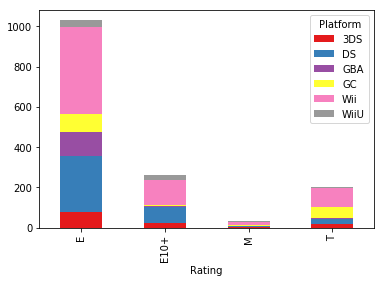

In [39]:
nintendo_sales= nintendo.groupby(['Rating', 'Platform'])['Global_Sales'].sum()
nintendo_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Set1',  grid=False)

In [52]:
current_gen= df_clean[(df_clean['Platform']== 'Wii') | (df_clean['Platform']== 'X360') | 
                                                        (df_clean['Platform']== 'PS3')]
current_gen.shape

(2106, 16)

Comparing the top selling platforms, last generation

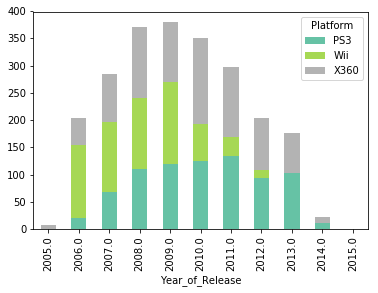

In [54]:
current_gen_sales= current_gen.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum()
current_gen_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Set2',  grid=False)

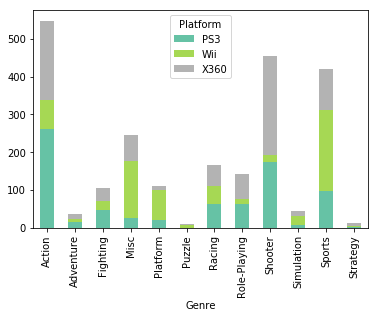

In [55]:
current_gen_sales= current_gen.groupby(['Genre', 'Platform'])['Global_Sales'].sum()
current_gen_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Set2',  grid=False)

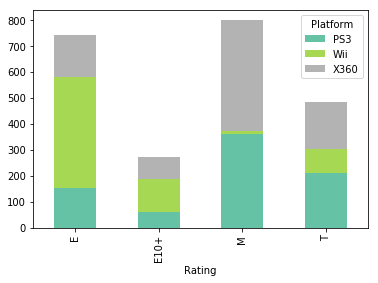

In [56]:
current_gen_sales= current_gen.groupby(['Rating', 'Platform'])['Global_Sales'].sum()
current_gen_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Set2',  grid=False)

last generation sales from North America

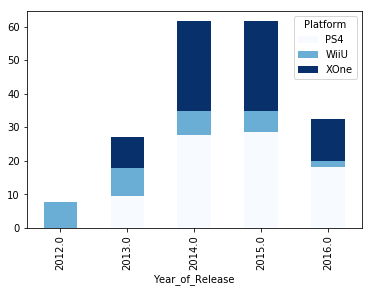

In [44]:
current_gen_sales= current_gen.groupby(['Year_of_Release', 'Platform'])['NA_Sales'].sum()
current_gen_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)

Last generation sales from Japan

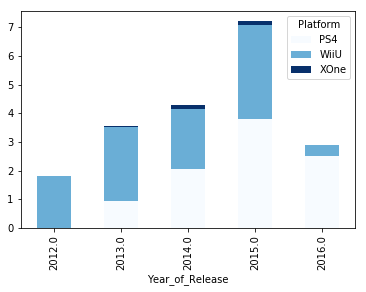

In [45]:
current_gen_sales= current_gen.groupby(['Year_of_Release', 'Platform'])['JP_Sales'].sum()
current_gen_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)

Last generation sales from EU

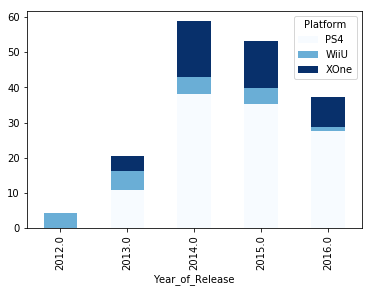

In [46]:
current_gen_sales= current_gen.groupby(['Year_of_Release', 'Platform'])['EU_Sales'].sum()
current_gen_sales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)